In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
df=pd.read_csv('logreg-th.csv')

In [3]:
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


# changing all column names to lower case

In [4]:
df.columns=[i.lower().strip() for i in df.columns]

In [5]:
df

,gender,nationality,placeofbirth,stageid,gradeid,sectionid,topic,semester,relation,raisedhands,visitedresources,announcementsview,discussion,parentansweringsurvey,parentschoolsatisfaction,studentabsencedays,class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


# EDA

In [208]:
num = df.select_dtypes(exclude='object')
num 

,raisedhands,visitedresources,announcementsview,discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50
...,...,...,...,...
475,5,4,5,8
476,50,77,14,28
477,55,74,25,29
478,30,17,14,57


In [209]:
cat = df.select_dtypes(include='object')
cat

,gender,nationality,placeofbirth,stageid,gradeid,sectionid,topic,semester,relation,parentansweringsurvey,parentschoolsatisfaction,studentabsencedays,class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,1
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,1
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,0
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,0
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,No,Bad,Above-7,0
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,No,Bad,Under-7,1
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,No,Bad,Under-7,1
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,No,Bad,Above-7,0


# BASIC INFO ABOUT DATAFRAME

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   nationality               480 non-null    object
 2   placeofbirth              480 non-null    object
 3   stageid                   480 non-null    object
 4   gradeid                   480 non-null    object
 5   sectionid                 480 non-null    object
 6   topic                     480 non-null    object
 7   semester                  480 non-null    object
 8   relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  visitedresources          480 non-null    int64 
 11  announcementsview         480 non-null    int64 
 12  discussion                480 non-null    int64 
 13  parentansweringsurvey     480 non-null    object
 14  parentschoolsatisfaction  

In [6]:
df.columns

Index(['gender', 'nationality', 'placeofbirth', 'stageid', 'gradeid',
       'sectionid', 'topic', 'semester', 'relation', 'raisedhands',
       'visitedresources', 'announcementsview', 'discussion',
       'parentansweringsurvey', 'parentschoolsatisfaction',
       'studentabsencedays', 'class'],
      dtype='object')

In [14]:
df['gender'].value_counts()

M    305
F    175
Name: gender, dtype: int64

In [8]:
df['gender'].value_counts(normalize=True)

M    0.635417
F    0.364583
Name: gender, dtype: float64

In [11]:
df['nationality'].value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: nationality, dtype: int64

In [13]:
df['nationality'].value_counts(normalize=True)

KW             0.372917
Jordan         0.358333
Palestine      0.058333
Iraq           0.045833
lebanon        0.035417
Tunis          0.025000
SaudiArabia    0.022917
Egypt          0.018750
Syria          0.014583
USA            0.012500
Iran           0.012500
Lybia          0.012500
Morocco        0.008333
venzuela       0.002083
Name: nationality, dtype: float64

In [17]:
df['placeofbirth'].value_counts()

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: placeofbirth, dtype: int64

In [14]:
df['placeofbirth'].value_counts(normalize=True)

KuwaIT         0.375000
Jordan         0.366667
Iraq           0.045833
lebanon        0.039583
SaudiArabia    0.033333
USA            0.033333
Palestine      0.020833
Egypt          0.018750
Tunis          0.018750
Iran           0.012500
Syria          0.012500
Lybia          0.012500
Morocco        0.008333
venzuela       0.002083
Name: placeofbirth, dtype: float64

In [18]:
df['stageid'].value_counts()

MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: stageid, dtype: int64

In [15]:
df['stageid'].value_counts(normalize=True)

MiddleSchool    0.516667
lowerlevel      0.414583
HighSchool      0.068750
Name: stageid, dtype: float64

In [19]:
df['gradeid'].value_counts()

G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: gradeid, dtype: int64

In [21]:
df['sectionid'].value_counts()

A    283
B    167
C     30
Name: sectionid, dtype: int64

In [38]:
df['topic'].value_counts()

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: topic, dtype: int64

In [22]:
df['semester'].value_counts()

F    245
S    235
Name: semester, dtype: int64

In [23]:
df['relation'].value_counts()

Father    283
Mum       197
Name: relation, dtype: int64

In [25]:
df['visitedresources'].describe()

count    480.000000
mean      54.797917
std       33.080007
min        0.000000
25%       20.000000
50%       65.000000
75%       84.000000
max       99.000000
Name: visitedresources, dtype: float64

In [26]:
df['announcementsview'].describe()

count    480.000000
mean      37.918750
std       26.611244
min        0.000000
25%       14.000000
50%       33.000000
75%       58.000000
max       98.000000
Name: announcementsview, dtype: float64

In [27]:
df['discussion'].describe()

count    480.000000
mean      43.283333
std       27.637735
min        1.000000
25%       20.000000
50%       39.000000
75%       70.000000
max       99.000000
Name: discussion, dtype: float64

In [28]:
df['parentansweringsurvey'].value_counts()

Yes    270
No     210
Name: parentansweringsurvey, dtype: int64

In [29]:
df['parentschoolsatisfaction'].value_counts()

Good    292
Bad     188
Name: parentschoolsatisfaction, dtype: int64

In [30]:
df['studentabsencedays'].value_counts()

Under-7    289
Above-7    191
Name: studentabsencedays, dtype: int64

In [31]:
df['class'].value_counts()

M    211
H    142
L    127
Name: class, dtype: int64

# labelencoding

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()
df.stageid=le.fit_transform(df.stageid)

In [18]:
df.stageid                  #ordinal columns

0      2
1      2
2      2
3      2
4      2
      ..
475    1
476    1
477    1
478    1
479    1
Name: stageid, Length: 480, dtype: int32

In [29]:
df['stageid'].value_counts()

1    248
2    199
0     33
Name: stageid, dtype: int64

In [21]:
df.gradeid=le.fit_transform(df.gradeid)

In [22]:
df.gradeid

0      1
1      1
2      1
3      1
4      1
      ..
475    5
476    5
477    5
478    5
479    5
Name: gradeid, Length: 480, dtype: int32

# encoding

In [7]:
df.select_dtypes(include='O') #returns only columns which have datatypes as objects

,gender,nationality,placeofbirth,stageid,gradeid,sectionid,topic,semester,relation,parentansweringsurvey,parentschoolsatisfaction,studentabsencedays,class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,No,Bad,Above-7,L


In [31]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [42]:
x_encoded=pd.get_dummies(x,drop_first=True)  # dropfrist=true is given to reduce columns whether male or female

In [43]:
x_encoded

,stageid,gradeid,raisedhands,visitedresources,announcementsview,discussion,gender_M,nationality_Iran,nationality_Iraq,nationality_Jordan,...,topic_IT,topic_Math,topic_Quran,topic_Science,topic_Spanish,semester_S,relation_Mum,parentansweringsurvey_Yes,parentschoolsatisfaction_Good,studentabsencedays_Under-7
0,2,1,15,16,2,20,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
1,2,1,20,20,3,25,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
2,2,1,10,7,0,30,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2,1,30,25,5,35,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2,1,40,50,12,50,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,5,5,4,5,8,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
476,1,5,50,77,14,28,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
477,1,5,55,74,25,29,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
478,1,5,30,17,14,57,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [40]:
x_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   stageid                        480 non-null    int32
 1   gradeid                        480 non-null    int32
 2   raisedhands                    480 non-null    int64
 3   visitedresources               480 non-null    int64
 4   announcementsview              480 non-null    int64
 5   discussion                     480 non-null    int64
 6   gender_F                       480 non-null    uint8
 7   gender_M                       480 non-null    uint8
 8   nationality_Egypt              480 non-null    uint8
 9   nationality_Iran               480 non-null    uint8
 10  nationality_Iraq               480 non-null    uint8
 11  nationality_Jordan             480 non-null    uint8
 12  nationality_KW                 480 non-null    uint8
 13  nationality_Lybia   

In [36]:
y=le.fit_transform(y)

In [37]:
y

array([2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 0, 2, 2, 2, 2, 0, 2, 2,
       2, 1, 1, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2,
       2, 1, 1, 0, 0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1,
       2, 0, 0, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 2,
       0, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 0, 0, 0, 2, 0, 2, 1, 1, 2, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 1,
       2, 0, 2, 2, 1, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 2, 1,
       0, 2, 0, 2, 0, 1, 0, 2, 1, 0, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0,
       1, 2, 0, 0, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0, 1, 1, 1, 2, 2, 0, 2,
       2, 2, 2, 0, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 0, 0, 2,
       1, 2, 0, 2, 0, 2, 1, 2, 0, 1, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2,
       0, 0, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 1,

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=1)

In [50]:
# import statsmodels.api as sm
 log_reg = sm.Logit(y_train, x_train).fit()                              # cannot use sm


In [56]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

In [62]:
model.score(x_test,y_test)

0.7013888888888888

In [58]:
from sklearn.metrics import classification_report

In [59]:
pred_train=model.predict(x_train)
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        87
           1       0.90      0.90      0.90        94
           2       0.85      0.86      0.86       155

    accuracy                           0.87       336
   macro avg       0.87      0.87      0.87       336
weighted avg       0.87      0.87      0.87       336



In [63]:
pred_test=model.predict(x_test)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72        55
           1       0.79      0.79      0.79        33
           2       0.60      0.68      0.64        56

    accuracy                           0.70       144
   macro avg       0.72      0.71      0.71       144
weighted avg       0.71      0.70      0.70       144



In [61]:
from sklearn.preprocessing import minmax_scale
from 

# sgd method

In [ ]:
from sklearn.linear_model import SGDClassifier
def model_sgd(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=1)
    model_sgd = SGDClassifier
    model_sgd.fit(x_train,y_train)
    pred_train=model_sgd.predict(x_train)
    pred_test=model_sgd.predict(x_test)
    print(classification_report(y_train,pred_train))
    print(classification_report(y_test,pred_test))


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

x=none
y=none

def model_glm(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=1)
    model_glm = LogisticRegression()
    model_glm.fit(x_train,y_train)
    pred_train=model_glm.predict(x_train)
    pred_test=model_glm.predict(x_test)
    print(classification_report(y_train,pred_train))
    print(classification_report(y_test,pred_test))

In [ ]:
model_glm(x,y)

In [ ]:
from sklearn.linear_model import descisionTreeClassifier
def model_dt(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=1)
    model_dt = descisionTreeClassifier()
    model_dt.fit(x_train,y_train)
    pred_train=model_dt.predict(x_train)
    pred_test=model_dt.predict(x_test)
    print(classification_report(y_train,pred_train))
    print(classification_report(y_test,pred_test))

In [ ]:
model_dt(x,y)

# finding null values

In [59]:
df.isnull().values.any().sum()

0

# outliers

In [60]:
df.describe()

,gender,stageid,semester,relation,raisedhands,visitedresources,announcementsview,discussion,parentansweringsurvey,parentschoolsatisfaction,studentabsencedays,class
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.364583,0.654167,0.510417,0.410417,46.775000,54.797917,37.918750,43.283333,0.562500,0.608333,0.602083,1.031250
std,0.481815,0.603732,0.500413,0.492423,30.779223,33.080007,26.611244,27.637735,0.496596,0.488632,0.489979,0.748738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,15.750000,20.000000,14.000000,20.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,50.000000,65.000000,33.000000,39.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,75.000000,84.000000,58.000000,70.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,2.000000,1.000000,1.000000,100.000000,99.000000,98.000000,99.000000,1.000000,1.000000,1.000000,2.000000


C:\Users\Ashok\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='raisedhands'>

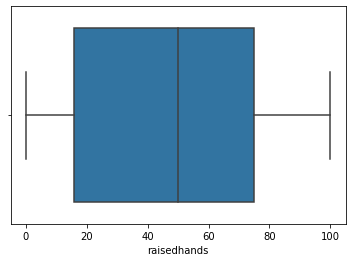

In [61]:
import seaborn as sns
sns.boxplot(df["raisedhands"])

C:\Users\Ashok\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='visitedresources'>

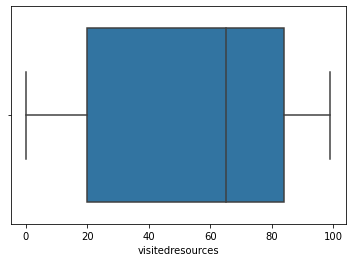

In [62]:
sns.boxplot(df['visitedresources'])

C:\Users\Ashok\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='announcementsview'>

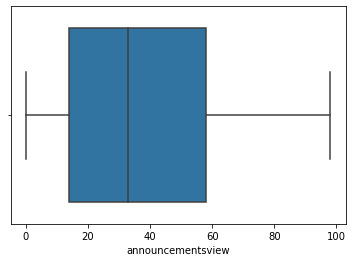

In [63]:
sns.boxplot(df['announcementsview'])

C:\Users\Ashok\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='discussion'>

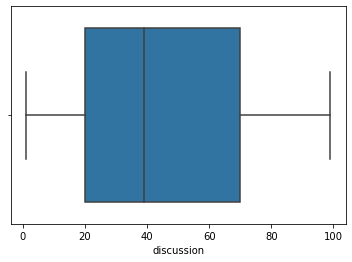

In [64]:
sns.boxplot(df['discussion'])

# mean values

In [66]:
df.groupby('parentschoolsatisfaction').mean()

,gender,stageid,semester,relation,raisedhands,visitedresources,announcementsview,discussion,parentansweringsurvey,studentabsencedays,class
parentschoolsatisfaction,,,,,,,,,,,
0,0.308511,0.664894,0.494681,0.234043,35.393617,39.813830,28.021277,41.180851,0.228723,0.462766,0.680851
1,0.400685,0.647260,0.520548,0.523973,54.102740,64.445205,44.291096,44.636986,0.777397,0.691781,1.256849


In [68]:
df.groupby('class').mean()

,gender,stageid,semester,relation,raisedhands,visitedresources,announcementsview,discussion,parentansweringsurvey,parentschoolsatisfaction,studentabsencedays
class,,,,,,,,,,,
0,0.188976,0.551181,0.606299,0.181102,16.889764,18.322835,15.574803,30.834646,0.220472,0.338583,0.086614
1,0.360190,0.691943,0.502370,0.350711,48.938389,60.635071,40.962085,43.791469,0.606635,0.620853,0.663507
2,0.528169,0.690141,0.436620,0.704225,70.288732,78.746479,53.380282,53.661972,0.802817,0.830986,0.971831


In [69]:
df.groupby('parentansweringsurvey').mean()

,gender,stageid,semester,relation,raisedhands,visitedresources,announcementsview,discussion,parentschoolsatisfaction,studentabsencedays,class
parentansweringsurvey,,,,,,,,,,,
0,0.352381,0.576190,0.52381,0.319048,35.738095,40.466667,25.971429,36.014286,0.309524,0.457143,0.661905
1,0.374074,0.714815,0.50000,0.481481,55.359259,65.944444,47.211111,48.937037,0.840741,0.714815,1.318519


In [70]:
df.groupby('studentabsencedays').mean()

,gender,stageid,semester,relation,raisedhands,visitedresources,announcementsview,discussion,parentansweringsurvey,parentschoolsatisfaction,class
studentabsencedays,,,,,,,,,,,
0,0.240838,0.570681,0.554974,0.277487,29.230366,34.513089,27.712042,35.853403,0.403141,0.471204,0.413613
1,0.446367,0.709343,0.480969,0.498270,58.370242,68.204152,44.664360,48.193772,0.667820,0.698962,1.439446


In [71]:
df.groupby('nationality').mean()

,gender,stageid,semester,relation,raisedhands,visitedresources,announcementsview,discussion,parentansweringsurvey,parentschoolsatisfaction,studentabsencedays,class
nationality,,,,,,,,,,,,
Egypt,0.222222,0.555556,0.222222,0.666667,41.222222,56.000000,44.000000,45.333333,0.444444,0.777778,0.444444,0.888889
Iran,0.166667,0.666667,0.333333,0.666667,20.833333,31.000000,25.666667,42.500000,0.500000,0.500000,0.333333,0.666667
Iraq,0.272727,0.545455,0.500000,0.363636,73.772727,83.863636,56.636364,50.272727,0.818182,1.000000,0.727273,1.636364
Jordan,0.459302,0.558140,0.482558,0.540698,48.860465,63.255814,42.406977,43.034884,0.534884,0.616279,0.575581,1.093023
KW,0.301676,0.703911,0.625698,0.223464,36.469274,40.558659,26.832402,43.966480,0.530726,0.497207,0.553073,0.821229
Lybia,0.333333,0.333333,0.500000,1.000000,13.166667,6.333333,8.833333,4.000000,0.000000,1.000000,0.000000,0.000000
Morocco,0.250000,0.750000,0.000000,0.750000,58.250000,57.500000,62.250000,48.750000,0.250000,0.250000,0.750000,1.000000
Palestine,0.285714,0.571429,0.500000,0.500000,81.535714,76.107143,59.678571,52.964286,0.714286,1.000000,0.928571,1.428571
SaudiArabia,0.363636,1.272727,0.272727,0.090909,55.636364,57.090909,50.272727,54.545455,0.727273,0.363636,0.636364,1.454545


# 1)Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?

<AxesSubplot:xlabel='parentschoolsatisfaction', ylabel='count'>

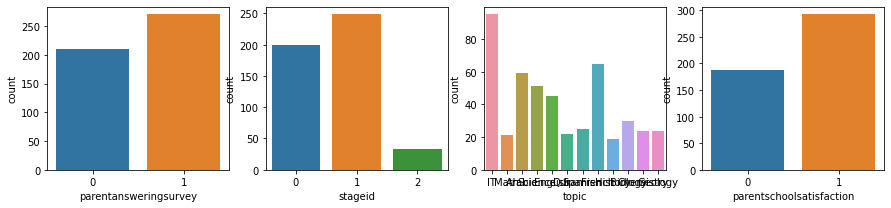

In [88]:
f,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=[15,3])
sns.countplot(data=df,x="parentansweringsurvey",ax=ax1)
sns.countplot(data=df,x="stageid",ax=ax2)
sns.countplot(data=df,x="topic",ax=ax3)
sns.countplot(data=df,x="parentschoolsatisfaction",ax=ax4)

C:\Users\Ashok\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

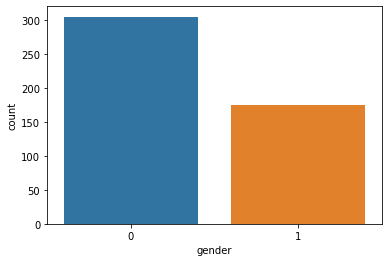

In [85]:
sns.countplot(df['gender'])

C:\Users\Ashok\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nationality', ylabel='count'>

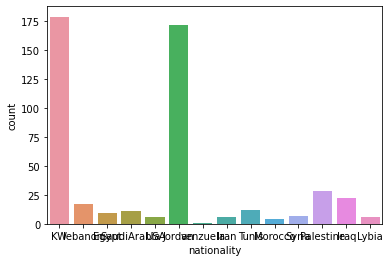

In [86]:
sns.countplot(df['nationality'])

C:\Users\Ashok\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='relation', ylabel='count'>

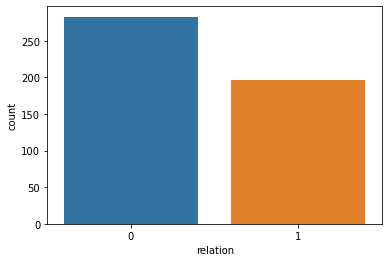

In [87]:
sns.countplot(df['relation'])

C:\Users\Ashok\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

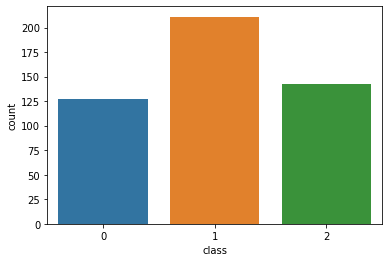

In [90]:
sns.countplot(df['class'])

# 2. Look at some categorical features in relation to each other, to see what insights could be possibly read?

<AxesSubplot:xlabel='class', ylabel='count'>

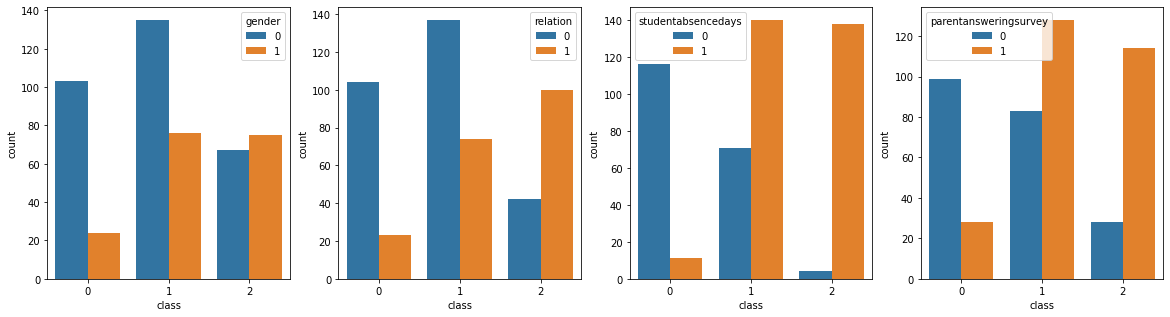

In [101]:
fig, (ax1,ax2,ax3,ax4)  = plt.subplots(1,4,figsize=(20,5))
sns.countplot(x='class', hue='gender', data=data, ax=ax1)
sns.countplot(x='class', hue='relation', data=data, ax=ax2)
sns.countplot(x='class', hue='studentabsencedays', data=data, ax=ax3)
sns.countplot(x='class', hue='parentansweringsurvey', data=data, ax=ax4)

<AxesSubplot:xlabel='semester', ylabel='count'>

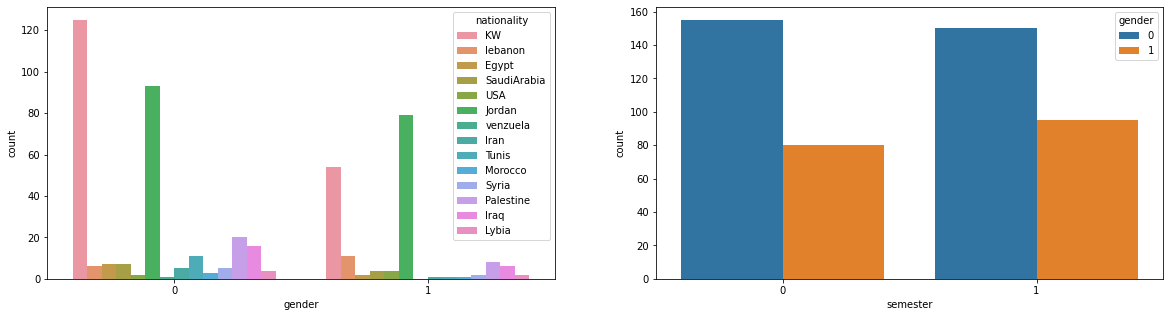

In [103]:
fig, (ax1,ax2)  = plt.subplots(1,2,figsize=(20,5))
sns.countplot(x='gender', hue='nationality', data=data, ax=ax1)
sns.countplot(x='semester', hue='gender', data=data, ax=ax2)

# 3. Visualize categorical variables with numerical variables and give conclusions?

<AxesSubplot:xlabel='class', ylabel='announcementsview'>

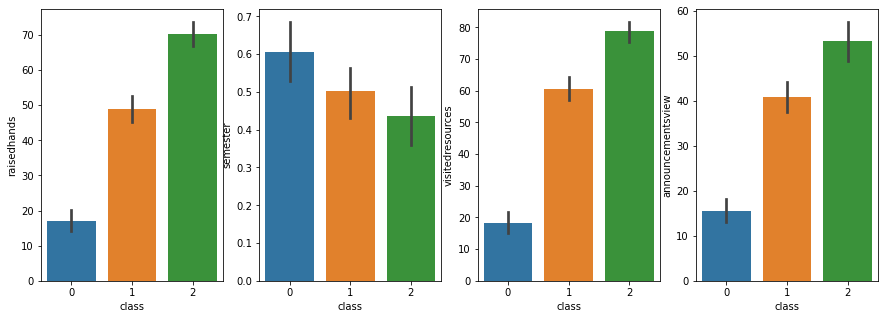

In [115]:
fig, (ax1,ax2,ax3,ax4)  = plt.subplots(1,4,figsize=(15,5))
sns.barplot(x='class', y='raisedhands', data=data, ax=ax1)
sns.barplot(x='class', y='semester', data=data, ax=ax2)
sns.barplot(x='class',y='visitedresources', data=data, ax=ax3)
sns.barplot(x='class',y='announcementsview', data=data, ax=ax4)

# 4. From the above result, what are the factors that leads to get low grades of the students?

In [152]:
df['numeric_class'] = [1 if df.loc[i,'class'] == '0' else 2 if df.loc[i,'class'] == '1' else 3 for i in range(len(data))]

Jordan average: 3.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'KW'),
  Text(1, 0, 'lebanon'),
  Text(2, 0, 'Egypt'),
  Text(3, 0, 'SaudiArabia'),
  Text(4, 0, 'USA'),
  Text(5, 0, 'Jordan'),
  Text(6, 0, 'venzuela'),
  Text(7, 0, 'Iran'),
  Text(8, 0, 'Tunis'),
  Text(9, 0, 'Morocco'),
  Text(10, 0, 'Syria'),
  Text(11, 0, 'Palestine'),
  Text(12, 0, 'Iraq'),
  Text(13, 0, 'Lybia')])

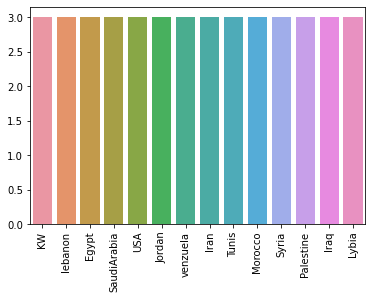

In [127]:
nation = df.nationality.unique()
nation_grades_ave = [sum(df[df.nationality == i].numeric_class)/float(len(data[df.nationality == i])) for i in nation]
ax = sns.barplot(x=nation, y=nation_grades_ave)
jordan_ave = sum(df[df.nationality == 'Jordan'].numeric_class)/float(len(df[df.nationality == 'Jordan']))
print('Jordan average: '+str(jordan_ave))
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Relation with father or mother affects success of students')

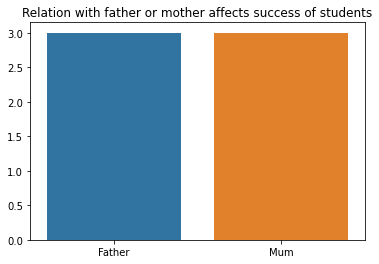

In [153]:
relation = df.relation.unique()
relation_grade_ave = [sum(df[df.relation == i].numeric_class)/float(len(df[df.relation == i])) for i in relation]
ax = sns.barplot(x=relation, y=relation_grade_ave)
plt.title('Relation with father or mother affects success of students')

# 5. Build classification model and present it's classification report ?

# SPLITTING DATA

In [177]:
x=df.iloc[:,:-1]
y=df['class']

In [178]:
df_dummies=pd.get_dummies(x,drop_first=True)

In [179]:
df_dummies

,raisedhands,visitedresources,announcementsview,discussion,gender_M,nationality_Iran,nationality_Iraq,nationality_Jordan,nationality_KW,nationality_Lybia,...,topic_IT,topic_Math,topic_Quran,topic_Science,topic_Spanish,semester_S,relation_Mum,parentansweringsurvey_Yes,parentschoolsatisfaction_Good,studentabsencedays_Under-7
0,15,16,2,20,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,1
1,20,20,3,25,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,1
2,10,7,0,30,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,30,25,5,35,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,40,50,12,50,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
476,50,77,14,28,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
477,55,74,25,29,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
478,30,17,14,57,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   raisedhands                    480 non-null    int64
 1   visitedresources               480 non-null    int64
 2   announcementsview              480 non-null    int64
 3   discussion                     480 non-null    int64
 4   gender_M                       480 non-null    uint8
 5   nationality_Iran               480 non-null    uint8
 6   nationality_Iraq               480 non-null    uint8
 7   nationality_Jordan             480 non-null    uint8
 8   nationality_KW                 480 non-null    uint8
 9   nationality_Lybia              480 non-null    uint8
 10  nationality_Morocco            480 non-null    uint8
 11  nationality_Palestine          480 non-null    uint8
 12  nationality_SaudiArabia        480 non-null    uint8
 13  nationality_Syria   

In [181]:
df['class']=df['class'].replace({'H':'2','M':'1','L':'0'})

In [184]:
data1 = data.drop('class',axis = 1)
data_with_dummies = pd.get_dummies(data1, drop_first=True)

In [185]:
Features = data_with_dummies.drop(['numeric_class'],axis = 1)
Target = data_with_dummies['numeric_class']


In [186]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Features)

StandardScaler()

In [193]:
x = scaler.fit_transform(Features)

In [194]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.33,random_state=12)

In [195]:
Logit_Model = LogisticRegression()
Logit_Model.fit(x_train,y_train)

LogisticRegression()

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
Prediction = Logit_Model.predict(x_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)

In [199]:
Prediction

array(['0', '1', '2', '2', '1', '2', '1', '0', '1', '0', '2', '1', '0',
       '1', '1', '1', '1', '1', '1', '2', '2', '2', '1', '1', '1', '0',
       '2', '1', '0', '0', '0', '2', '2', '2', '1', '0', '2', '2', '1',
       '1', '1', '2', '1', '1', '1', '2', '1', '1', '1', '1', '1', '2',
       '1', '1', '0', '1', '2', '2', '2', '0', '2', '2', '2', '1', '1',
       '2', '2', '2', '2', '1', '2', '1', '1', '1', '1', '2', '1', '1',
       '1', '2', '1', '2', '1', '1', '2', '2', '1', '0', '0', '2', '1',
       '0', '1', '2', '2', '1', '0', '2', '2', '0', '2', '2', '1', '0',
       '1', '0', '2', '2', '2', '0', '2', '1', '1', '2', '2', '1', '1',
       '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '0',
       '1', '2', '1', '1', '2', '1', '1', '1', '0', '1', '1', '0', '1',
       '1', '1', '1', '2', '1', '2', '2', '1', '0', '2', '2', '1', '1',
       '0', '1', '2'], dtype=object)

In [200]:
Score

0.7421383647798742

In [201]:
print(Report)

              precision    recall  f1-score   support

           0       0.85      0.64      0.73        36
           1       0.66      0.79      0.72        66
           2       0.81      0.75      0.78        57

    accuracy                           0.74       159
   macro avg       0.77      0.73      0.74       159
weighted avg       0.76      0.74      0.74       159



# multicolinearity test

In [202]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
def multicolinearity_check(x):
    vif_data = pd.DataFrame()
    vif_data['feature'] = x.columns
    vif_data['VIF'] = [vif(x.values,i) for i in range(len(x.columns))]
    return vif_data

In [207]:
multicolinearity_check(num)

,feature,VIF
0,raisedhands,7.624493
1,visitedresources,6.893179
2,announcementsview,6.075343
3,discussion,3.365527
